In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st

In [2]:
games= pd.read_csv("/Users/jorgecossyleongomez/Downloads/games.csv")

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.columns= games.columns.str.lower()

In [5]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
games.duplicated().sum()

0

In [8]:
games = games.dropna(subset=['name'])

In [9]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [10]:
games["year_of_release"].mean()

2006.4862563853078

In [11]:
games["year_of_release"].median()

2007.0

<function matplotlib.pyplot.show(close=None, block=None)>

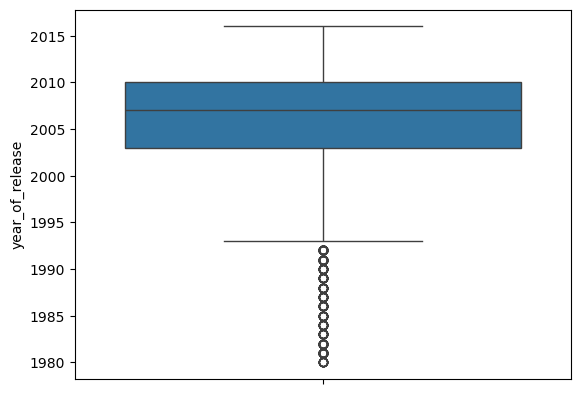

In [12]:
sns.boxplot(games["year_of_release"])
plt.show

In [13]:
games.loc[:, 'year_of_release'] = games['year_of_release'].fillna(games['year_of_release'].median())

In [14]:
games["year_of_release"]= games["year_of_release"].astype(int)

In [15]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [16]:
games["critic_score"].mean()

68.96767850559173

In [17]:
games["critic_score"].median()

71.0

<function matplotlib.pyplot.show(close=None, block=None)>

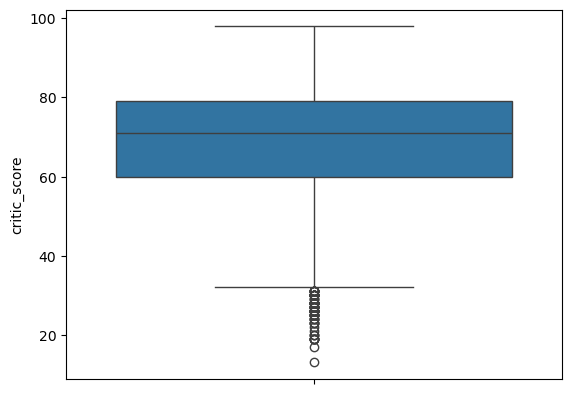

In [18]:
sns.boxplot(games["critic_score"])
plt.show

In [19]:
games.loc[:, 'critic_score'] = games['critic_score'].fillna(games['critic_score'].median())

In [20]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,71.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,71.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2007,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,71.0,tbd,E


In [21]:
games.loc[games["user_score"]== "tbd", "user_score"] = np.nan

In [22]:
games['user_score']= games['user_score'].astype("float")

In [23]:
games["user_score"].mean()

7.125046113306983

In [24]:
games["user_score"].median()

7.5

In [25]:
games.loc[:, 'user_score'] = games['user_score'].fillna(games['user_score'].median())

In [26]:
games.loc[:, "rating"]=games["rating"].fillna("Desconocido")

Comenzamos el proyecto limpiando los datos y filtrando las variables más relevantes. Esto incluyó eliminar valores nulos y procesar las columnas de interés como las calificaciones de los usuarios (user_score), las plataformas de videojuegos (platform) y los géneros de los juegos (genre). Esto para asegurar la validez de las pruebas estadísticas y las visualizaciones.

In [27]:
games["ventas_totales"]= games[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)

In [28]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Desconocido,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Desconocido,31.38


In [29]:
juegos_x_año= games.groupby("year_of_release")["platform"].count().sort_index(ascending=False).reset_index(name="numero_de_juegos")

In [30]:
juegos_x_año.head()

,year_of_release,numero_de_juegos
0,2016,502
1,2015,606
2,2014,581
3,2013,544
4,2012,653


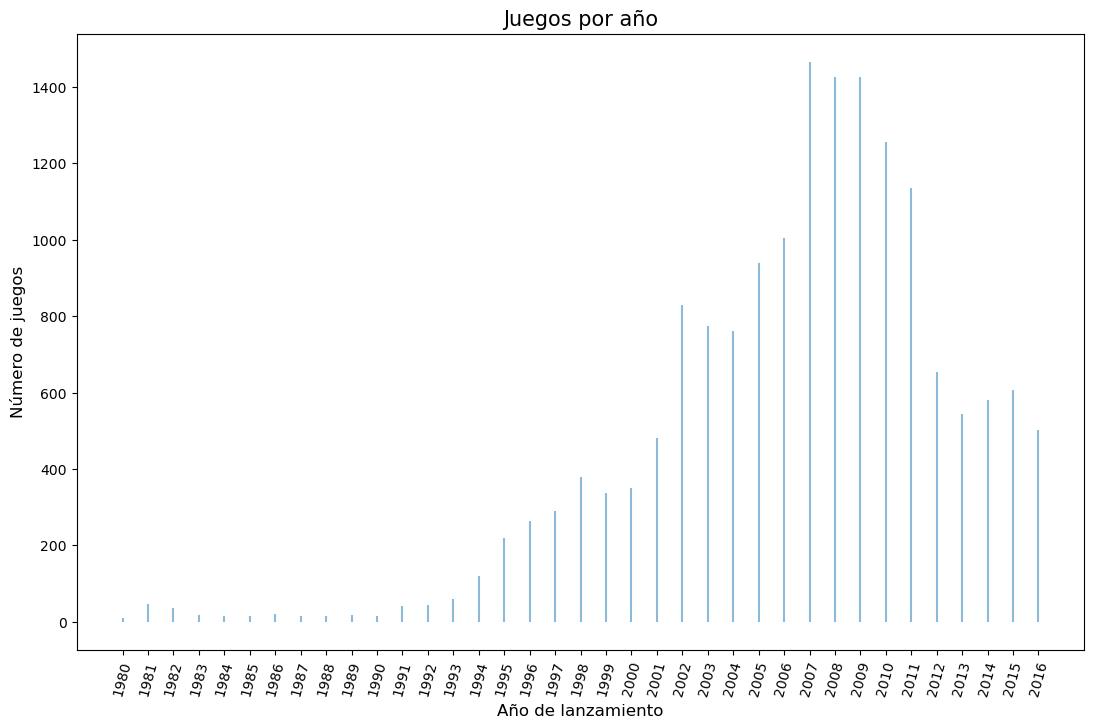

In [31]:
fig, ax= plt.subplots(figsize=(13,8))
ax.vlines(x=juegos_x_año.year_of_release, ymin=0, ymax=juegos_x_año.numero_de_juegos, alpha=0.5)
ax.set_title("Juegos por año", fontsize=15)
ax.set_xticks(juegos_x_año.year_of_release)
ax.set_xticklabels(juegos_x_año.year_of_release, rotation=75)
ax.set_xlabel("Año de lanzamiento", fontsize=12)
ax.set_ylabel("Número de juegos", fontsize=12)
plt.show()

In [32]:
ventas_plataforma= games.groupby(["year_of_release", "platform"])["ventas_totales"].sum().sort_index(ascending=False).reset_index(name="ventas_anuales")

In [33]:
ventas_plataforma

,year_of_release,platform,ventas_anuales
0,2016,XOne,26.15
1,2016,X360,1.52
2,2016,WiiU,4.60
3,2016,Wii,0.18
4,2016,PSV,4.25
...,...,...,...
239,1983,NES,10.96
240,1983,2600,5.84
241,1982,2600,28.88
242,1981,2600,35.68


In [34]:
ventas_anuales= ventas_plataforma.head(45)

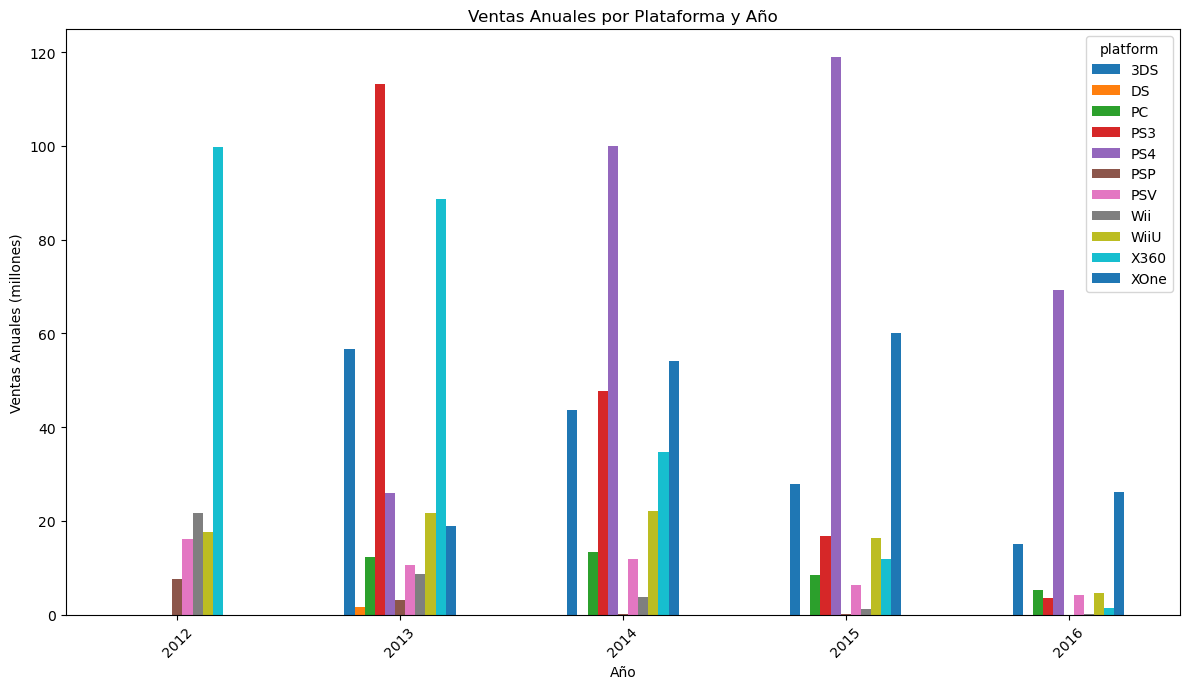

In [35]:
ventas_pivot = ventas_anuales.pivot_table(index='year_of_release', columns='platform', values='ventas_anuales')

ventas_pivot.plot(kind='bar', figsize=(12, 7))

plt.title('Ventas Anuales por Plataforma y Año')
plt.xlabel('Año')
plt.ylabel('Ventas Anuales (millones)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [36]:
tiempo_vida=games.pivot_table(index="year_of_release", columns="platform", values="ventas_totales", aggfunc="sum").fillna(0)

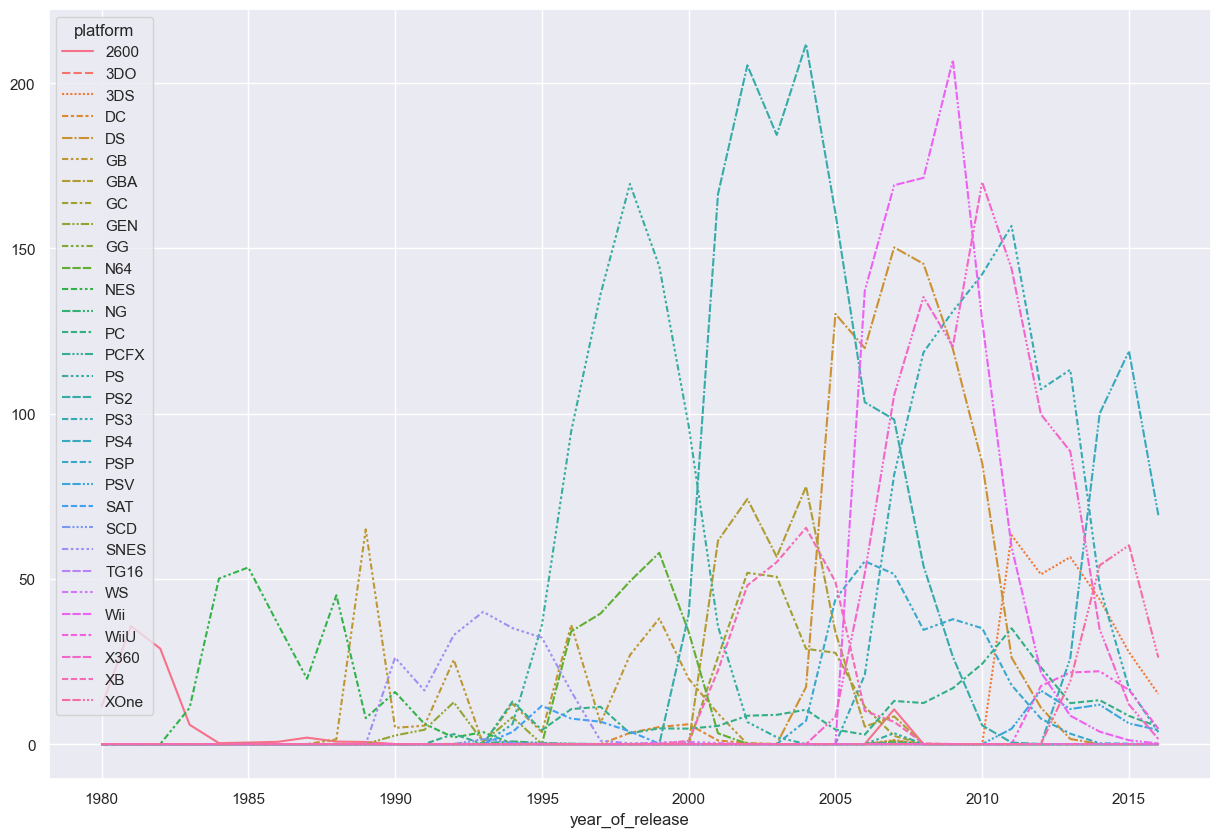

In [37]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(data=tiempo_vida)
plt.show()

In [38]:
datos_recientes= games[games["year_of_release"]>=2012]

In [39]:
datos_recientes

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,Desconocido,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,71.0,7.5,Desconocido,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,Desconocido,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,71.0,7.5,Desconocido,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,Desconocido,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,Desconocido,0.01


In [40]:
lideres= datos_recientes.groupby("platform")["ventas_totales"].sum().sort_values(ascending=False).reset_index(name="ventas_totales")

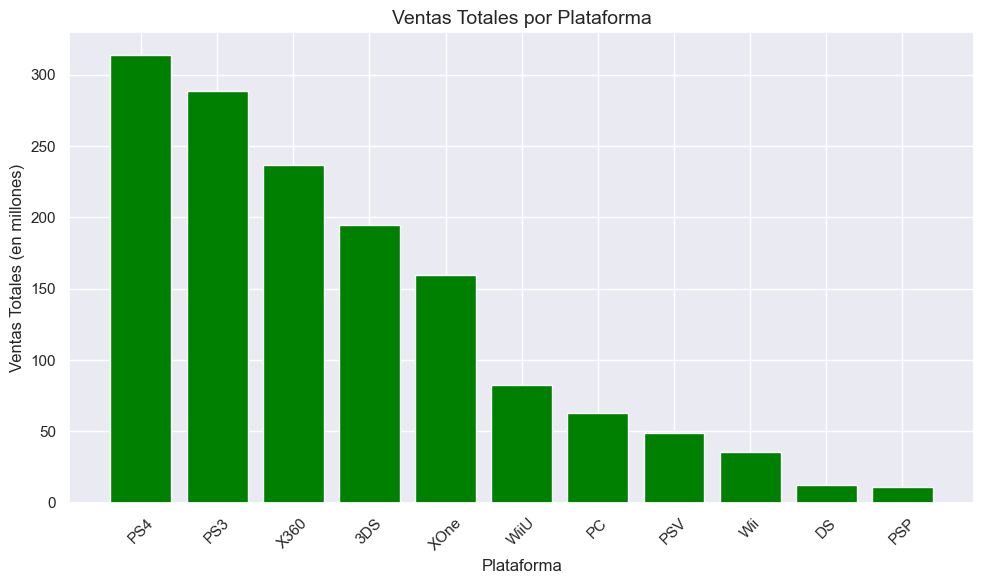

In [41]:
plt.figure(figsize=(10, 6)) 
plt.bar(lideres['platform'], lideres['ventas_totales'], color="green")

plt.title('Ventas Totales por Plataforma', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

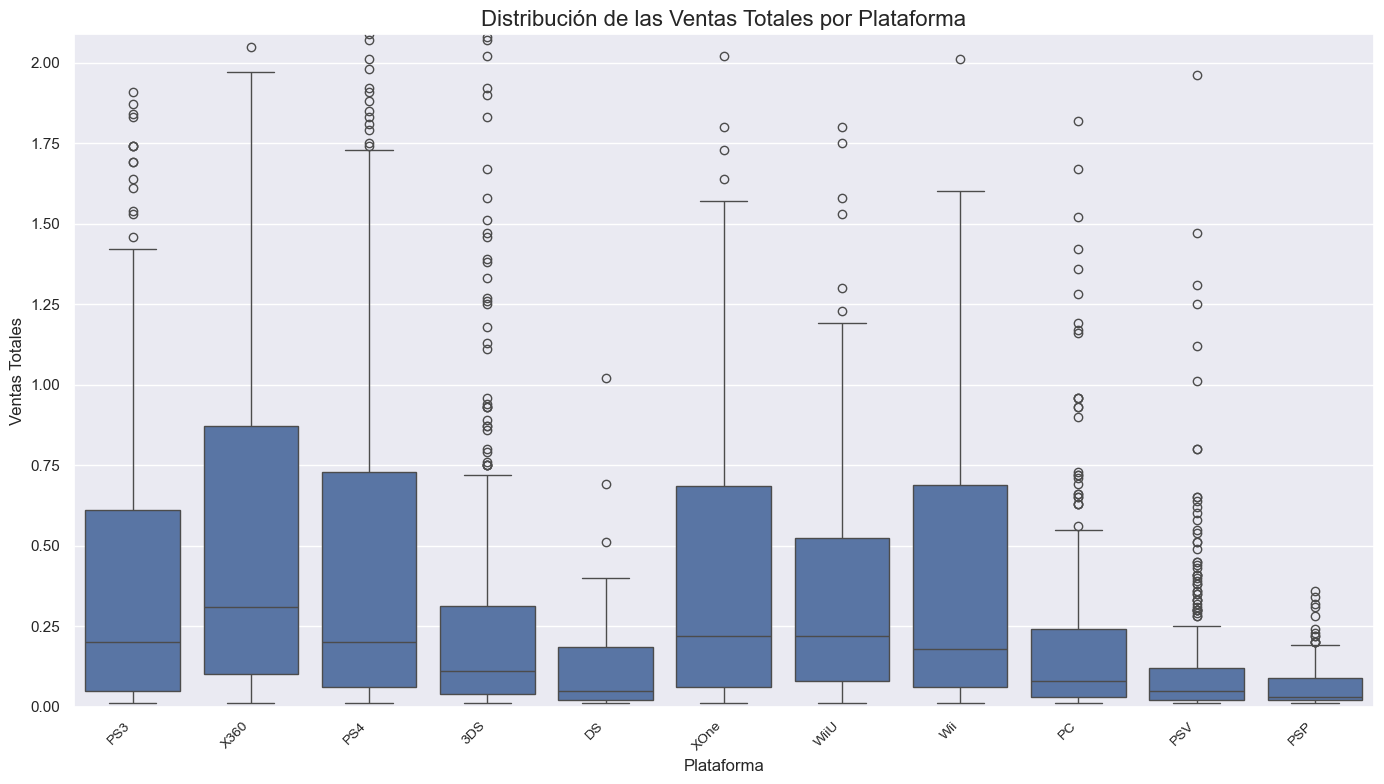

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8)) 
sns.boxplot(
    x="platform", 
    y="ventas_totales", 
    data=datos_recientes, 
    whis=1.5  
)

plt.title('Distribución de las Ventas Totales por Plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.ylim(0, datos_recientes['ventas_totales'].quantile(0.95))  

plt.tight_layout()  
plt.show()

In [43]:
xbox360 = datos_recientes[datos_recientes["platform"]== "X360"]

In [44]:
xbox_360 = xbox360.groupby("genre")["ventas_totales"].sum().sort_values(ascending=False).reset_index(name="ventas")
xbox_360

,genre,ventas
0,Action,81.60
1,Shooter,72.70
2,Sports,36.39
3,Misc,14.83
4,Role-Playing,9.80
5,Racing,8.41
6,Fighting,4.97
7,Adventure,3.27
8,Platform,2.14
9,Simulation,1.53


In [45]:
xbox360_user_score =xbox360.groupby("genre")["user_score"].mean().reset_index(name="promedio_critica_usuario")
xbox360_user_score

,genre,promedio_critica_usuario
0,Action,6.812745
1,Adventure,6.937500
2,Fighting,6.487500
3,Misc,6.921429
4,Platform,5.883333
5,Racing,6.076190
6,Role-Playing,6.278571
7,Shooter,6.487755
8,Simulation,7.350000
9,Sports,5.486364


In [46]:
xbox360_critic_score= xbox360.groupby("genre")["critic_score"].mean().reset_index(name="promedio_critica")
xbox360_critic_score

,genre,promedio_critica
0,Action,71.205882
1,Adventure,69.687500
2,Fighting,69.375000
3,Misc,71.142857
4,Platform,72.500000
5,Racing,69.714286
6,Role-Playing,70.500000
7,Shooter,70.081633
8,Simulation,64.375000
9,Sports,73.681818


In [47]:
xbox_360= xbox_360.merge(xbox360_critic_score, on= "genre")

In [48]:
xbox_360= xbox_360.merge(xbox360_user_score, on="genre")
xbox_360

,genre,ventas,promedio_critica,promedio_critica_usuario
0,Action,81.60,71.205882,6.812745
1,Shooter,72.70,70.081633,6.487755
2,Sports,36.39,73.681818,5.486364
3,Misc,14.83,71.142857,6.921429
4,Role-Playing,9.80,70.500000,6.278571
5,Racing,8.41,69.714286,6.076190
6,Fighting,4.97,69.375000,6.487500
7,Adventure,3.27,69.687500,6.937500
8,Platform,2.14,72.500000,5.883333
9,Simulation,1.53,64.375000,7.350000


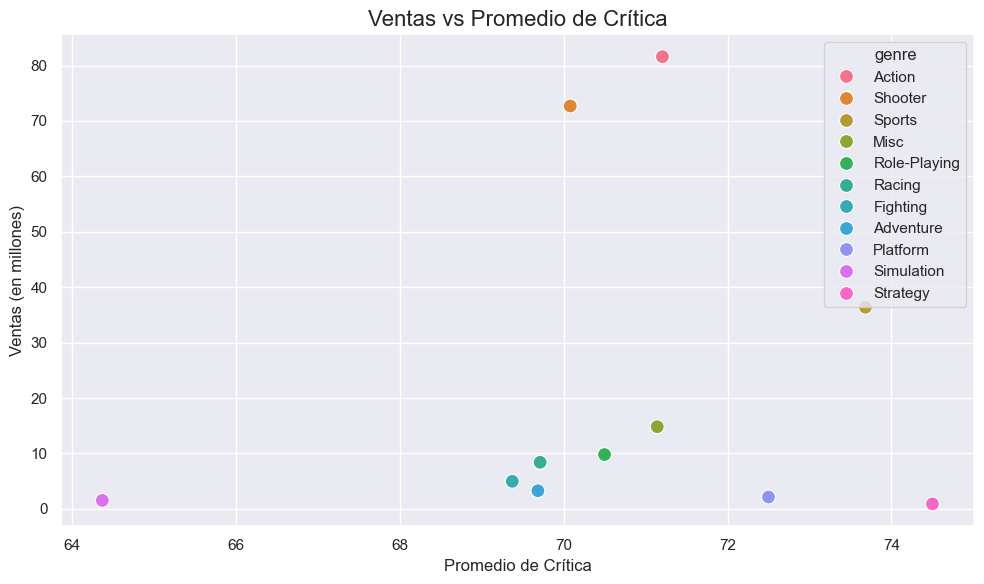

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="promedio_critica", y="ventas", data=xbox_360, hue= "genre", s=100, marker='o')


plt.title('Ventas vs Promedio de Crítica', fontsize=16)
plt.xlabel('Promedio de Crítica', fontsize=12)
plt.ylabel('Ventas (en millones)', fontsize=12)

plt.tight_layout()
plt.show()


In [50]:
correlacion= (xbox_360['ventas'].corr(xbox_360['promedio_critica']))
correlacion

0.1392483813995825

In [51]:
repeticiones = datos_recientes['name'].value_counts()

juegos_repetidos = repeticiones[repeticiones > 2].index

filas_repetidas = datos_recientes[datos_recientes['name'].isin(juegos_repetidos)]

filas_repetidas.sort_values(by="name").reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,AKB1/149: Love Election,PSP,2012,Adventure,0.00,0.00,0.23,0.00,71.0,7.5,Desconocido,0.23
1,AKB1/149: Love Election,PSV,2012,Adventure,0.00,0.00,0.07,0.00,71.0,7.5,Desconocido,0.07
2,AKB1/149: Love Election,PS3,2013,Adventure,0.00,0.00,0.08,0.00,71.0,7.5,Desconocido,0.08
3,Adventure Time: Explore the Dungeon Because I ...,X360,2013,Action,0.03,0.04,0.00,0.01,71.0,7.5,Desconocido,0.08
4,Adventure Time: Explore the Dungeon Because I ...,3DS,2013,Action,0.10,0.03,0.00,0.01,71.0,7.5,Desconocido,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...
1232,ZombiU,WiiU,2012,Action,0.52,0.36,0.05,0.08,77.0,7.7,M,1.01
1233,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,71.0,7.5,Desconocido,0.01
1234,[Prototype 2],PS3,2012,Action,0.36,0.28,0.00,0.10,79.0,6.8,M,0.74
1235,[Prototype 2],PC,2012,Action,0.07,0.03,0.00,0.01,76.0,6.4,M,0.11


In [52]:
top_juegos= filas_repetidas[filas_repetidas["ventas_totales"]> 7]
top_juegos.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,Desconocido,14.63
3,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
4,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
5,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,71.0,7.5,Desconocido,9.18
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


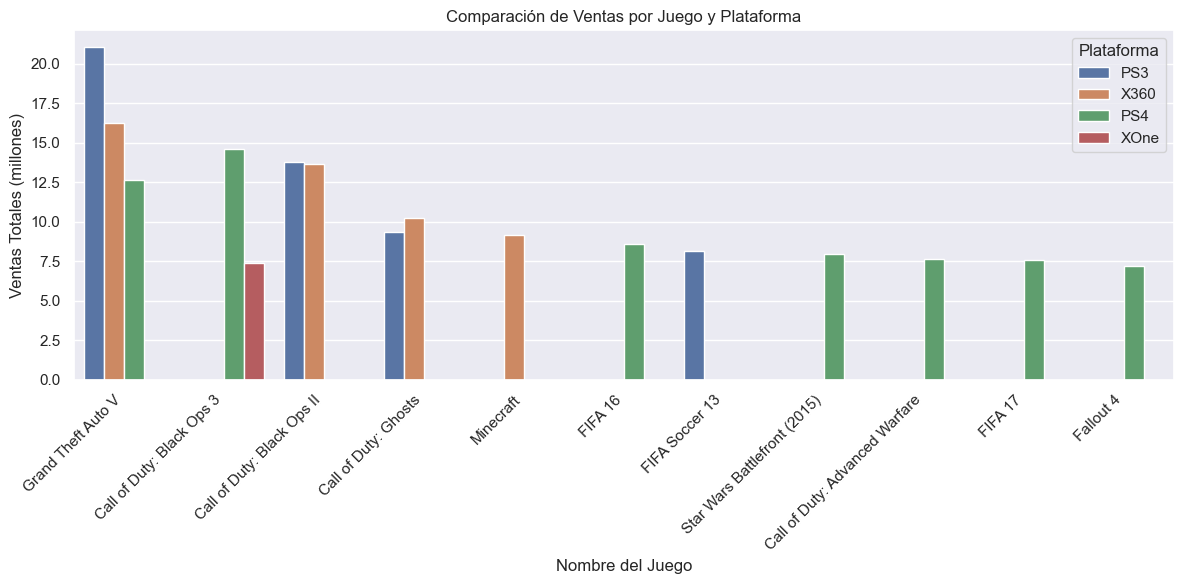

In [53]:
plt.figure(figsize=(12, 6)) 

sns.barplot(x="name", y="ventas_totales", data=top_juegos, hue="platform")


plt.title('Comparación de Ventas por Juego y Plataforma')
plt.xlabel('Nombre del Juego')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45, ha="right") 
plt.legend(title='Plataforma')


plt.tight_layout()
plt.show()


In [54]:
generos= datos_recientes.groupby("genre")["name"].count()
generos= generos.reset_index(name="numero_juegos")

In [55]:
ventas_genero = datos_recientes.groupby("genre")["ventas_totales"].sum().reset_index()
ventas_genero

,genre,ventas_totales
0,Action,441.12
1,Adventure,29.43
2,Fighting,44.49
3,Misc,85.04
4,Platform,61.00
5,Puzzle,4.89
6,Racing,53.50
7,Role-Playing,192.80
8,Shooter,304.73
9,Simulation,35.12


In [56]:
volumen_venta= pd.merge(generos, ventas_genero, on="genre")
volumen_venta["promedio_venta"]= volumen_venta["ventas_totales"]/ volumen_venta["numero_juegos"]
volumen_venta.sort_values(by="ventas_totales", ascending=False).reset_index(drop=True)

,genre,numero_juegos,ventas_totales,promedio_venta
0,Action,1031,441.12,0.427856
1,Shooter,235,304.73,1.296723
2,Role-Playing,370,192.80,0.521081
3,Sports,268,181.07,0.675634
4,Misc,192,85.04,0.442917
5,Platform,85,61.00,0.717647
6,Racing,115,53.50,0.465217
7,Fighting,109,44.49,0.408165
8,Simulation,80,35.12,0.439000
9,Adventure,302,29.43,0.097450


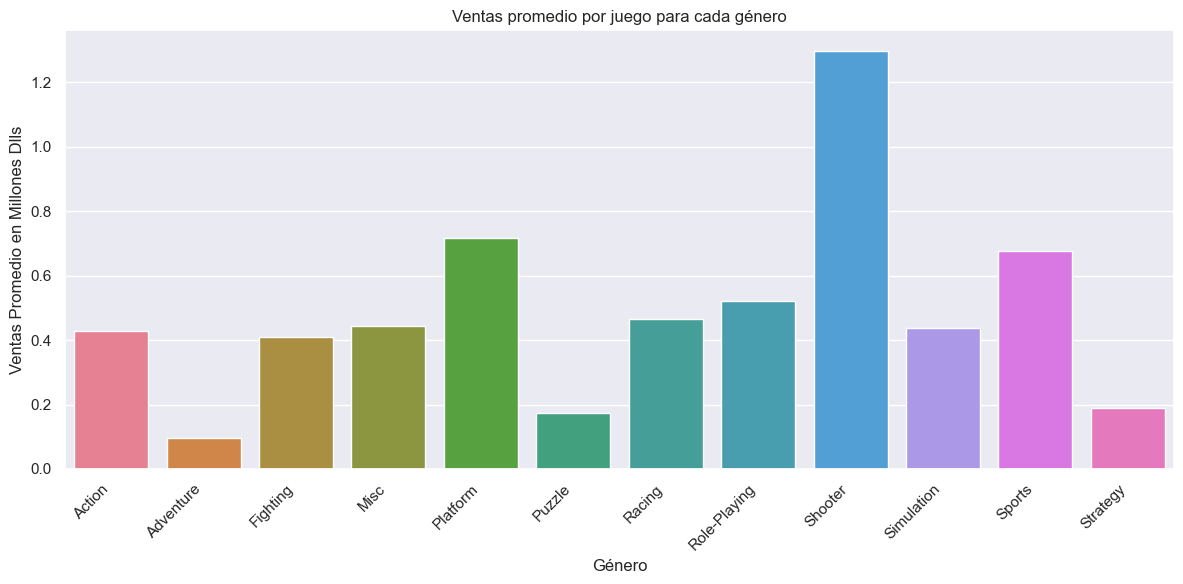

In [57]:
plt.figure(figsize=(12, 6)) 

sns.barplot(x="genre", y="promedio_venta", data=volumen_venta, hue="genre")

plt.xticks(rotation=45, ha="right") 
plt.title('Ventas promedio por juego para cada género')
plt.ylabel('Ventas Promedio en Millones Dlls')
plt.xlabel('Género')

plt.tight_layout()
plt.show()


In [58]:
norteamerica_platform= datos_recientes.groupby("platform")["na_sales"].sum().sort_values(ascending=False).reset_index(name="ventas")
top_5_na= norteamerica_platform.head(5)
top_5_na

,platform,ventas
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


In [59]:
europa_platform= datos_recientes.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).reset_index(name="ventas")
top_5_eu= europa_platform.head(5)
top_5_eu

,platform,ventas
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


In [60]:
plataformas_globales= pd.merge(top_5_na, top_5_eu,  on="platform", suffixes=['_na', '_eu'])
plataformas_globales

,platform,ventas_na,ventas_eu
0,X360,140.05,74.52
1,PS4,108.74,141.09
2,PS3,103.38,106.86
3,XOne,93.12,51.59
4,3DS,55.31,42.64


In [61]:
japon_platform= datos_recientes.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).reset_index(name="ventas")
top_5_jp= japon_platform.head(5)
top_5_jp

,platform,ventas
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


In [62]:
plataformas_globales= plataformas_globales.merge(top_5_jp, on="platform", how="outer")
plataformas_globales.rename(columns={'ventas': 'ventas_jp'}, inplace=True)

In [63]:
plataformas_globales

,platform,ventas_na,ventas_eu,ventas_jp
0,3DS,55.31,42.64,87.79
1,PS3,103.38,106.86,35.29
2,PS4,108.74,141.09,15.96
3,PSV,NaN,NaN,21.04
4,WiiU,NaN,NaN,13.01
5,X360,140.05,74.52,NaN
6,XOne,93.12,51.59,NaN


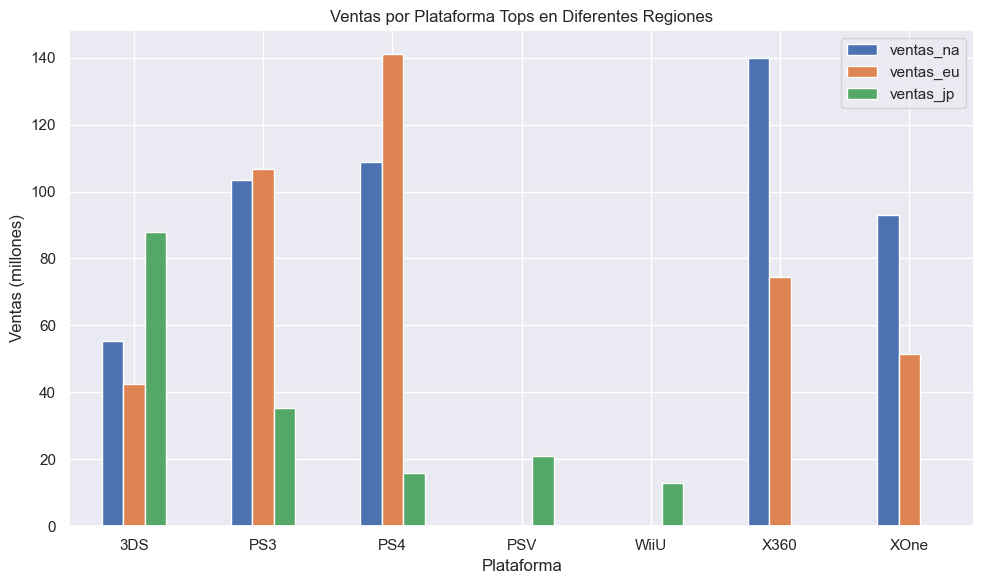

In [64]:
plataformas_globales.set_index('platform').plot(kind='bar', figsize=(10, 6))

plt.title('Ventas por Plataforma Tops en Diferentes Regiones')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')

plt.xticks(rotation=0)  
plt.tight_layout()

plt.show()


In [65]:
genre_games_na= datos_recientes.groupby("genre")["na_sales"].sum().sort_values(ascending=False).reset_index(name="ventas_na")
mejores_generos_na= genre_games_na.head(5)
mejores_generos_na

,genre,ventas_na
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


In [66]:
genre_games_eu= datos_recientes.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).reset_index(name="ventas_eu")
mejores_generos_eu= genre_games_eu.head(5)
mejores_generos_eu

,genre,ventas_eu
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


In [67]:
mejores_generos=pd.merge(mejores_generos_na, mejores_generos_eu, on="genre", how="outer")
mejores_generos

,genre,ventas_na,ventas_eu
0,Action,177.84,159.34
1,Misc,38.19,NaN
2,Racing,NaN,27.29
3,Role-Playing,64.00,48.53
4,Shooter,144.77,113.47
5,Sports,81.53,69.09


In [68]:
genre_games_jp= datos_recientes.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).reset_index(name="ventas_jp")
mejores_generos_jp= genre_games_jp.head(5)
mejores_generos_jp

,genre,ventas_jp
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


In [69]:
mejores_generos=mejores_generos.merge(mejores_generos_jp, on="genre", how="outer")
mejores_generos

,genre,ventas_na,ventas_eu,ventas_jp
0,Action,177.84,159.34,52.80
1,Fighting,NaN,NaN,9.44
2,Misc,38.19,NaN,12.86
3,Racing,NaN,27.29,NaN
4,Role-Playing,64.00,48.53,65.44
5,Shooter,144.77,113.47,NaN
6,Simulation,NaN,NaN,10.41
7,Sports,81.53,69.09,NaN


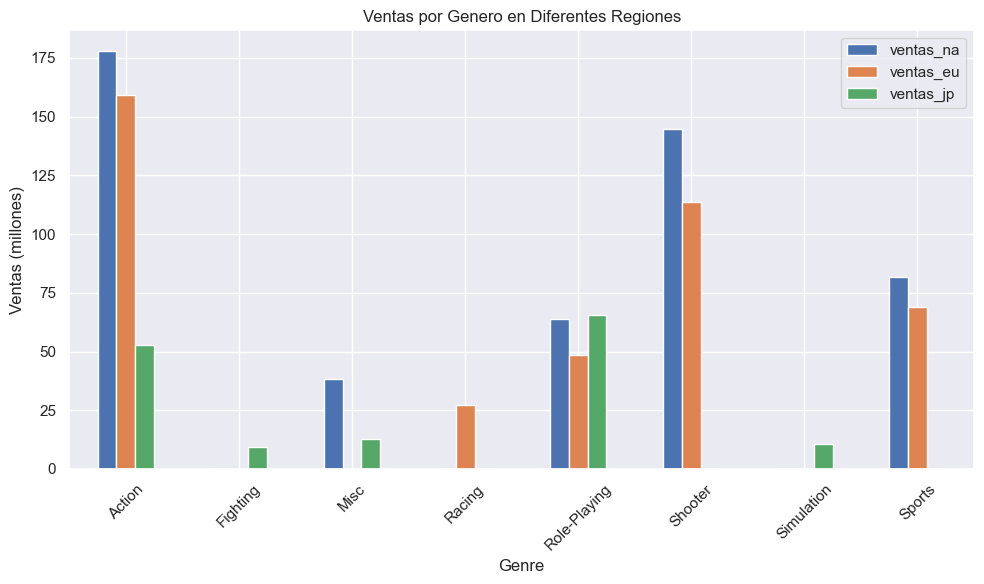

In [70]:
mejores_generos.set_index('genre').plot(kind='bar', figsize=(10, 6))

plt.title('Ventas por Genero en Diferentes Regiones')
plt.xlabel('Genre')
plt.ylabel('Ventas (millones)')

plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()

In [71]:
clasificacion_games_na= datos_recientes.groupby("rating")["na_sales"].sum().sort_values(ascending=False).reset_index(name="ventas_na")
clasificacion_na= clasificacion_games_na.head(10)

In [72]:
clasificacion_na = clasificacion_na[clasificacion_na['rating'] != 'Desconocido']
clasificacion_na

,rating,ventas_na
0,M,231.57
1,E,114.37
3,E10+,75.70
4,T,66.02


In [73]:
clasificacion_games_eu= datos_recientes.groupby("rating")["eu_sales"].sum().sort_values(ascending=False).reset_index(name="ventas_eu")
clasificacion_eu= clasificacion_games_eu.head()

In [74]:
clasificacion_eu = clasificacion_eu[clasificacion_eu['rating'] != 'Desconocido']
clasificacion_eu

,rating,ventas_eu
0,M,193.96
1,E,113.03
3,E10+,55.37
4,T,52.96


In [75]:
clasificacion_games_jp= datos_recientes.groupby("rating")["jp_sales"].sum().sort_values(ascending=False).reset_index(name="ventas_jp")
clasificacion_jp= clasificacion_games_jp

In [76]:
clasificacion_jp = clasificacion_jp[clasificacion_jp['rating'] != 'Desconocido']
clasificacion_jp

,rating,ventas_jp
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


In [77]:
clasificaciones= pd.merge(clasificacion_na, clasificacion_eu, on="rating")
clasificaciones

,rating,ventas_na,ventas_eu
0,M,231.57,193.96
1,E,114.37,113.03
2,E10+,75.70,55.37
3,T,66.02,52.96


In [78]:
clasificaciones= clasificaciones.merge(clasificacion_jp, on="rating", how="outer")
clasificaciones

,rating,ventas_na,ventas_eu,ventas_jp
0,E,114.37,113.03,28.33
1,E10+,75.70,55.37,8.19
2,M,231.57,193.96,21.20
3,T,66.02,52.96,26.02


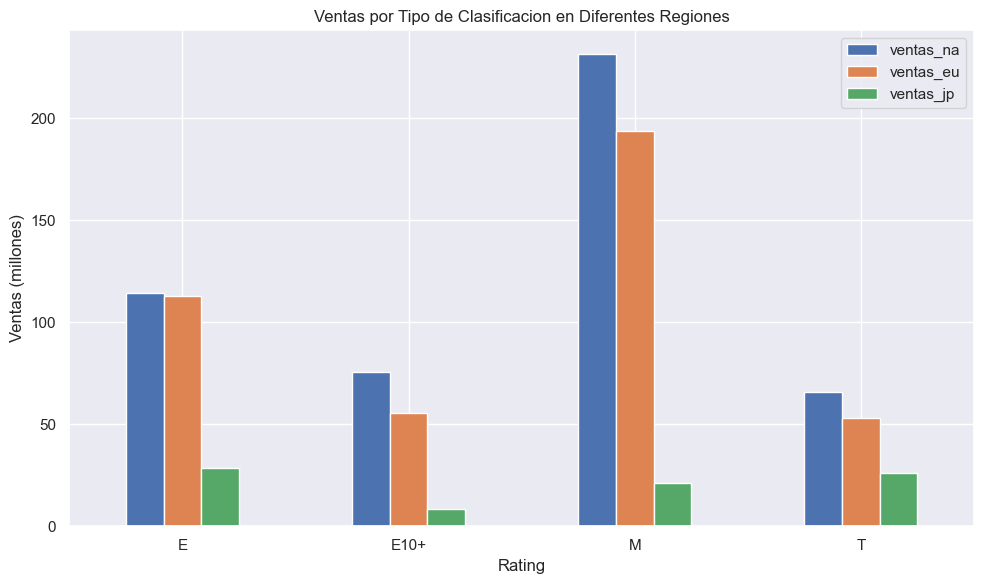

In [79]:
clasificaciones.set_index('rating').plot(kind='bar', figsize=(10, 6))

plt.title('Ventas por Tipo de Clasificacion en Diferentes Regiones')
plt.xlabel('Rating')
plt.ylabel('Ventas (millones)')

plt.xticks(rotation=0)  
plt.tight_layout()

plt.show()

Se exploraron las distribuciones de las calificaciones de los usuarios para diferentes plataformas y géneros mediante histogramas y gráficos de barras. Esto permitió visualizar cómo los usuarios puntúan los juegos en diversas plataformas (como XOne, PC, PS4, entre otras) y por género (como Acción, Deportes, etc.). Esta fase proporcionó una comprensión general de las distribuciones y las características de los datos, como la variabilidad en las calificaciones entre diferentes plataformas y géneros.


Hipotesis 1 : Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [81]:
hyp_data = datos_recientes.query("user_score > 0 & (platform == 'XOne' or platform == 'PC')")

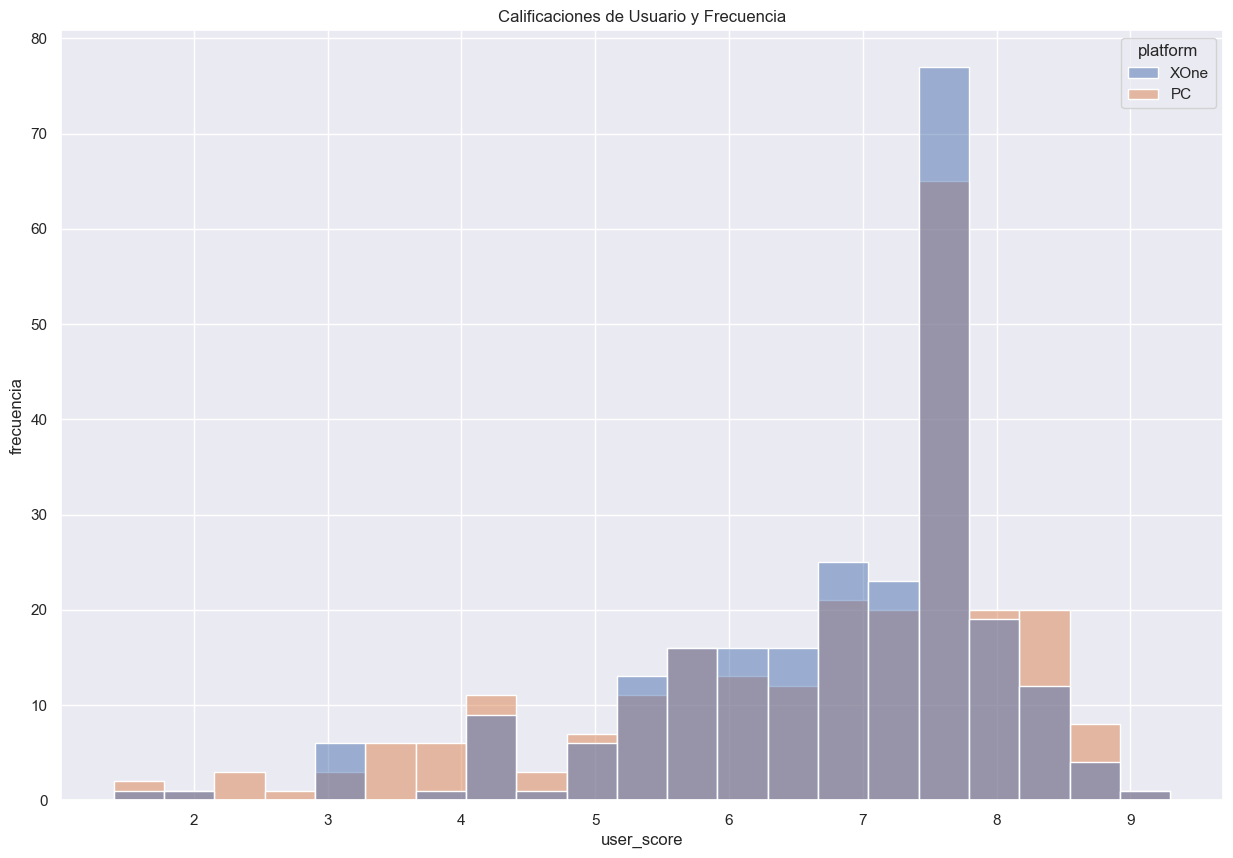

In [82]:
sns.histplot(hyp_data, x="user_score", hue="platform")
plt.ylabel("frecuencia")
plt.xlabel("user_score")
plt.title("Calificaciones de Usuario y Frecuencia")
plt.show()

In [83]:
hyp_data.groupby("platform")["user_score"].mean()

platform
PC      6.617200
XOne    6.778947
Name: user_score, dtype: float64

In [84]:
Xone= hyp_data.query("platform == 'XOne'")
PC= hyp_data.query("platform == 'PC'")

H0: Las diferencias entre el promedio de score de usuarios al x1 y pc NO son estadisticamente significativas, es decir son iguales.

H1: Las diferencias entre el promedio de score de usuarios al x1 y pc son estadisticamente significativas, es decir son diferentes.


In [86]:
nivel_confianza=0.95
alpha= 0.05

In [87]:
p_value_levene= st.levene(Xone["user_score"], PC["user_score"]).pvalue

if p_value_levene < alpha:
    print("Se rechaza la H0: Las varianzas de Xone y PC son diferentes")
else:
    print("No se puede rechazar H0: No hay evidencia suficiente para decir que las varianzas de Xone y PC son diferentes")


Se rechaza la H0: Las varianzas de Xone y PC son diferentes


In [88]:
Xone_scores = datos_recientes[datos_recientes['platform'] == 'XOne']['user_score'].dropna()
PC_scores = datos_recientes[datos_recientes['platform'] == 'PC']['user_score'].dropna()

resultado = st.ttest_ind(Xone_scores, PC_scores, equal_var=False)

print("Estadístico t:", resultado.statistic)
print("Valor p:", resultado.pvalue)

alpha = 0.05

if resultado.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre las plataformas XOne y PC.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las diferencias son significativas.")

Estadístico t: 1.2697297005594277
Valor p: 0.2048015550340031
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las diferencias son significativas.


Hipotesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [90]:
datos_recientes["genre"].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [91]:
hyp_data2 = datos_recientes.query("user_score > 0 & (genre == 'Action' or genre == 'Sports')")
print(hyp_data2.head())

                  name platform  year_of_release   genre  na_sales  eu_sales  \
16  Grand Theft Auto V      PS3             2013  Action      7.02      9.09   
23  Grand Theft Auto V     X360             2013  Action      9.66      5.14   
42  Grand Theft Auto V      PS4             2014  Action      3.96      6.31   
77             FIFA 16      PS4             2015  Sports      1.12      6.12   
81      FIFA Soccer 13      PS3             2012  Action      1.06      5.01   

    jp_sales  other_sales  critic_score  user_score rating  ventas_totales  
16      0.98         3.96          97.0         8.2      M           21.05  
23      0.06         1.41          97.0         8.1      M           16.27  
42      0.38         1.97          97.0         8.3      M           12.62  
77      0.06         1.28          82.0         4.3      E            8.58  
81      0.13         1.97          88.0         6.6      E            8.17  


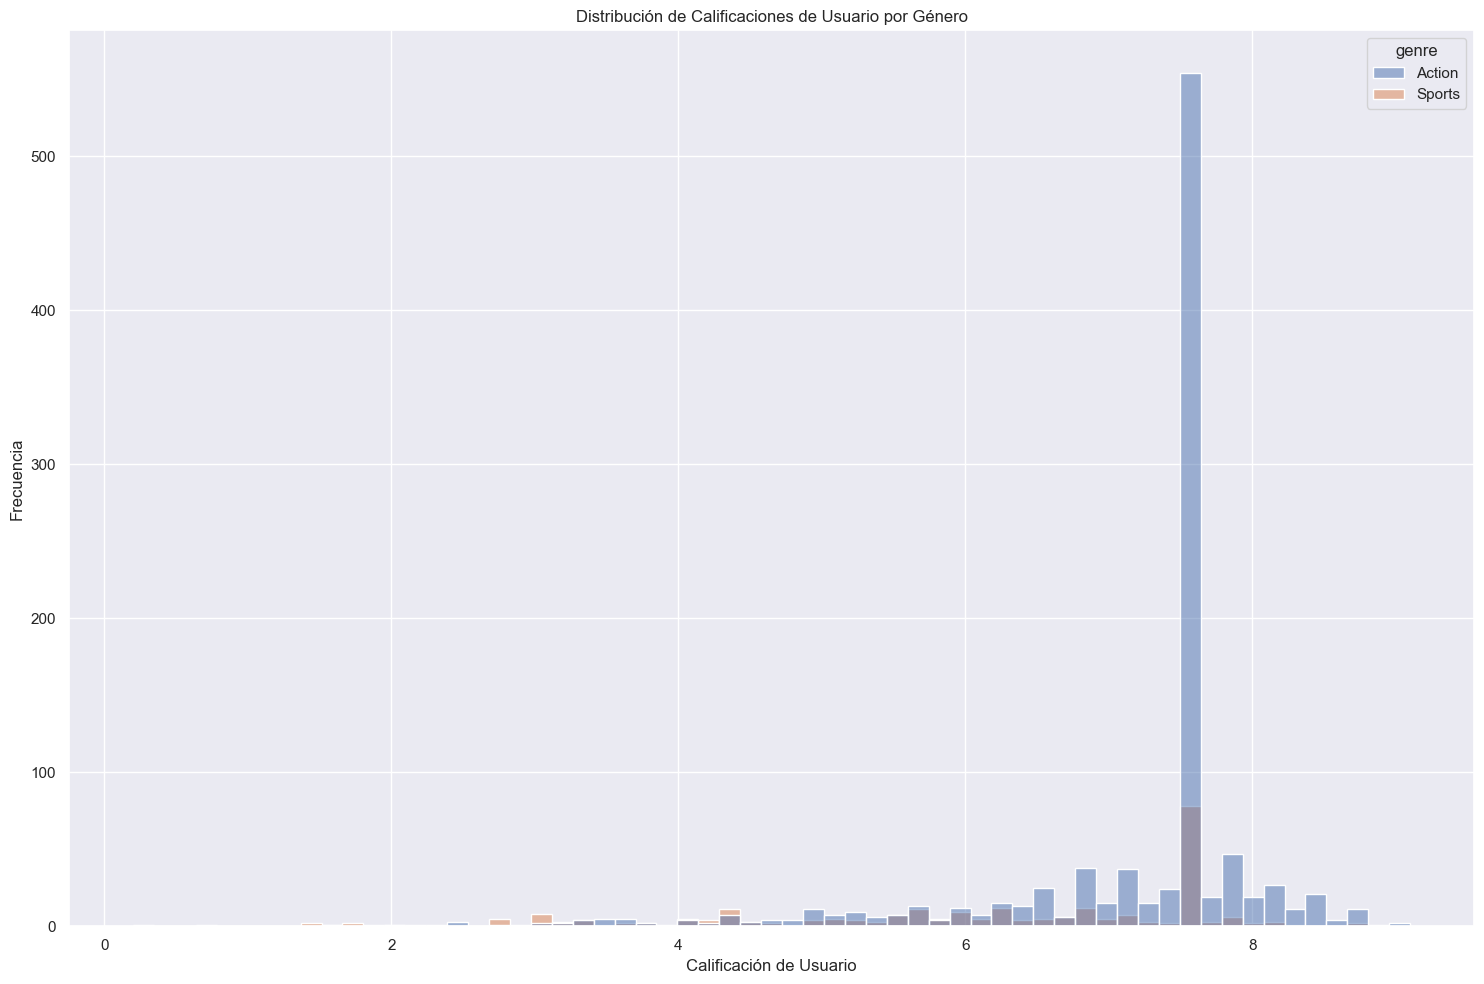

In [92]:
sns.histplot(hyp_data2, x="user_score", hue="genre")


plt.ylabel("Frecuencia")
plt.xlabel("Calificación de Usuario")
plt.title("Distribución de Calificaciones de Usuario por Género")


plt.tight_layout()
plt.show()

In [93]:
hyp_data2.groupby("genre")["user_score"].mean()

genre
Action    7.157614
Sports    6.012687
Name: user_score, dtype: float64

In [94]:
Action= hyp_data2.query("genre == 'Action'")
Sports= hyp_data2.query("genre == 'Sports'")

H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son significativamente diferentes.

H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes.

In [96]:
nivel_confianza=0.95
alpha= 0.05

In [97]:
p_value_levene2= st.levene(Action["user_score"], Sports["user_score"]).pvalue

if p_value_levene2 < alpha:
    print("Se rechaza la H0: Las varianzas de Action y Sports son diferentes")
else:
    print("No se puede rechazar H0: No hay evidencia suficiente para decir que las varianzas de Action y Sports son diferentes")

Se rechaza la H0: Las varianzas de Action y Sports son diferentes


In [98]:
Action_scores = datos_recientes[datos_recientes['genre'] == 'Action']['user_score'].dropna()
Sports_scores = datos_recientes[datos_recientes['genre'] == 'Sports']['user_score'].dropna()

resultado2 = st.ttest_ind(Action_scores, Sports_scores, equal_var=False)

print("Estadístico t:", resultado.statistic)
print("Valor p:", resultado.pvalue)

alpha = 0.05

if resultado.pvalue < alpha:
    print("Se rechaza la hipótesis nula: Las calificaciones promedio de los géneros Action y Sports son significativamente diferentes.")
else:
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio de los géneros Action y Sports son diferentes.")

Estadístico t: 1.2697297005594277
Valor p: 0.2048015550340031
No se rechaza la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio de los géneros Action y Sports son diferentes.


Realizamos una prueba de Levene para comparar las varianzas de las calificaciones de los usuarios entre plataformas específicas, como XOne y PC. Esta prueba nos ayudó a determinar si las varianzas en las calificaciones eran significativamente diferentes entre las dos plataformas. Dependiendo de los resultados, decidimos si aplicar una prueba t para dos muestras con varianzas iguales o desiguales.

Una vez que obtuvimos los resultados de la prueba de Levene, pasamos a realizar una prueba t de Student para comparar las medias de las calificaciones de los usuarios en las plataformas XOne y PC. Aquí, analizamos si había una diferencia significativa en las calificaciones promedio entre ambas plataformas. Este análisis es crucial para entender si las percepciones de los usuarios sobre la calidad de los juegos en diferentes plataformas son significativamente diferentes o si, por el contrario, las plataformas presentan calificaciones similares.

Se llevó a cabo un análisis específico sobre dos géneros de videojuegos: Acción y Deportes. Al igual que con las plataformas, se utilizó la prueba t para comparar las calificaciones promedio entre estos géneros. Los resultados de esta prueba nos permitieron determinar si las diferencias en las calificaciones de los usuarios para estos géneros son estadísticamente significativas, es decir, si la media de las calificaciones para los juegos de acción es significativamente diferente a la de los juegos deportivos.

En resumen, este proyecto proporcionó un análisis completo de los datos relacionados con las calificaciones de los usuarios en videojuegos, y a través de pruebas estadísticas y visualizaciones, se lograron conclusiones valiosas que podrían ser utilizadas para decisiones estratégicas en la industria de los videojuegos.

Se crearon gráficos que ayudaron a visualizar las distribuciones de calificaciones entre plataformas y géneros, facilitando la interpretación de los resultados. Los histogramas y gráficos de barras fueron especialmente útiles para identificar patrones o tendencias en las calificaciones y las ventas, y para presentar los resultados de las pruebas de hipótesis de forma clara.